<a href="https://colab.research.google.com/github/angwelo/ASSIGNMENT-/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_titanic_dataset_path = kagglehub.dataset_download('yasserh/titanic-dataset')

print('Data source import complete.')


Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [4]:
#Importing the dataset
titanic=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
titanic.tail(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S


In [5]:
#checking for duplicates
titanic.duplicated().sum()

np.int64(0)

In [6]:
#checking for null values
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
#checking for the number of rows and columns
print(f"The datset has {titanic.shape[0]} number of rows and {titanic.shape[1]} number of columns")

The datset has 891 number of rows and 12 number of columns


#### EDA

In [8]:
#Dropping the columns with over half of the values missing
titanic.drop("Cabin",axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### VISUALIZATION

In [9]:
#Visualizing numeric columns
num_cols=titanic.select_dtypes(include="number").columns
print(num_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


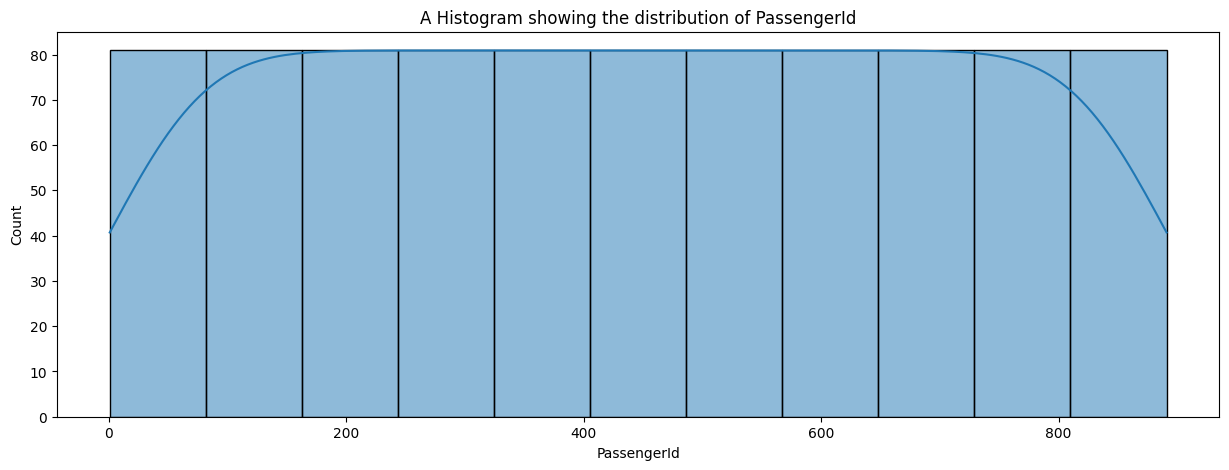

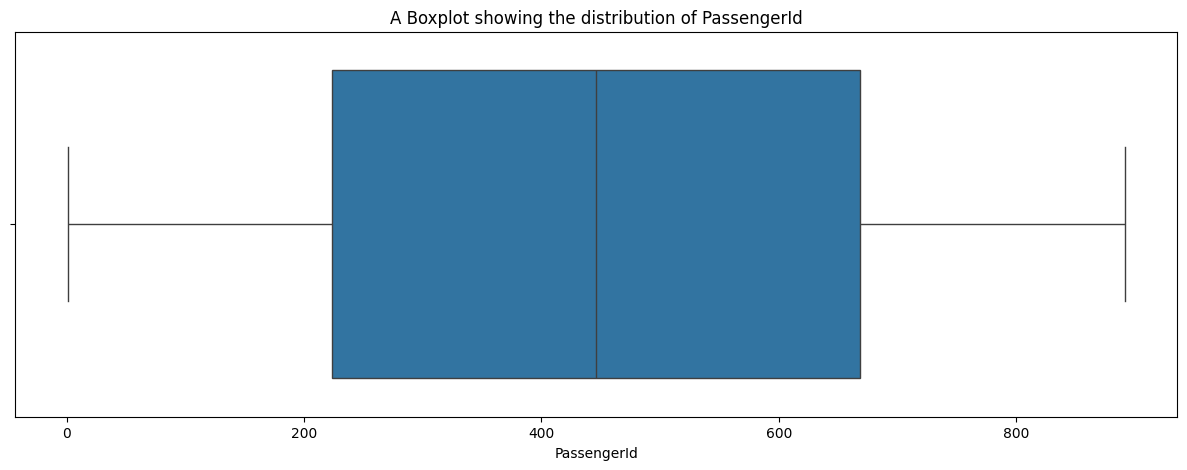

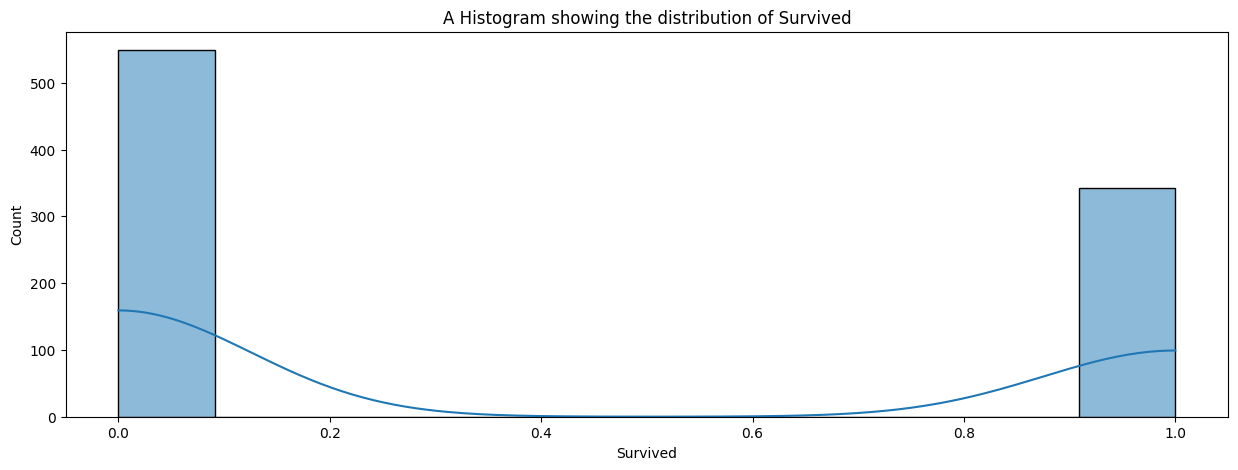

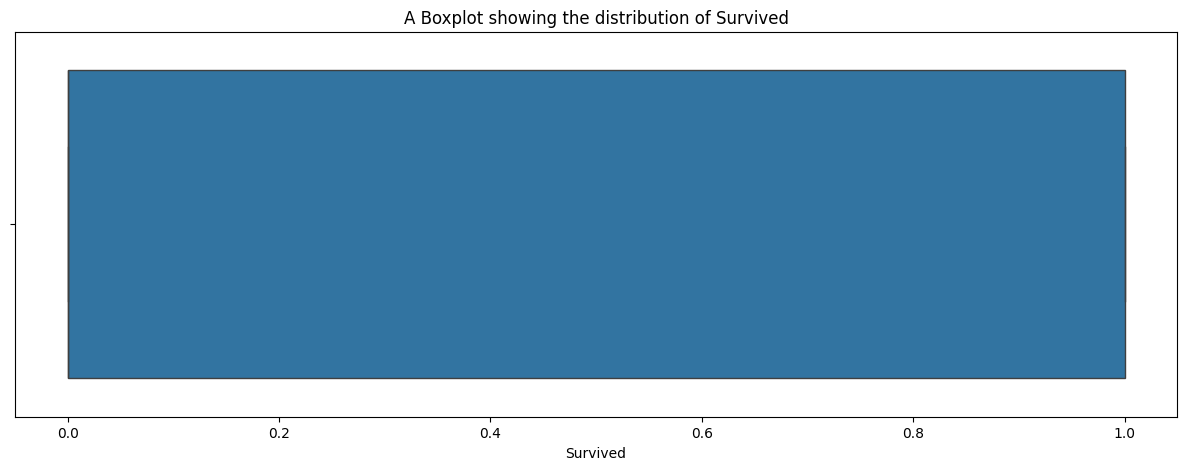

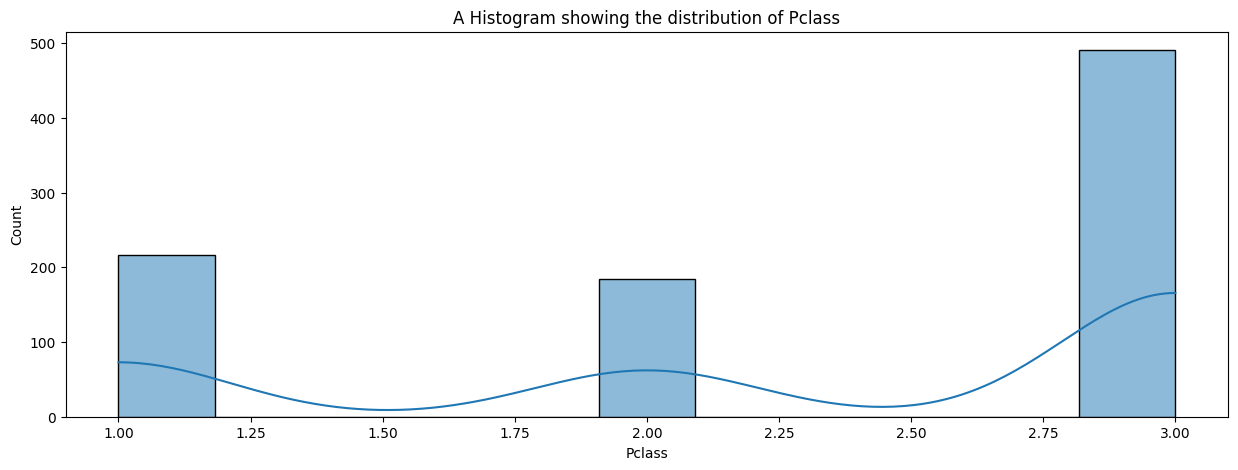

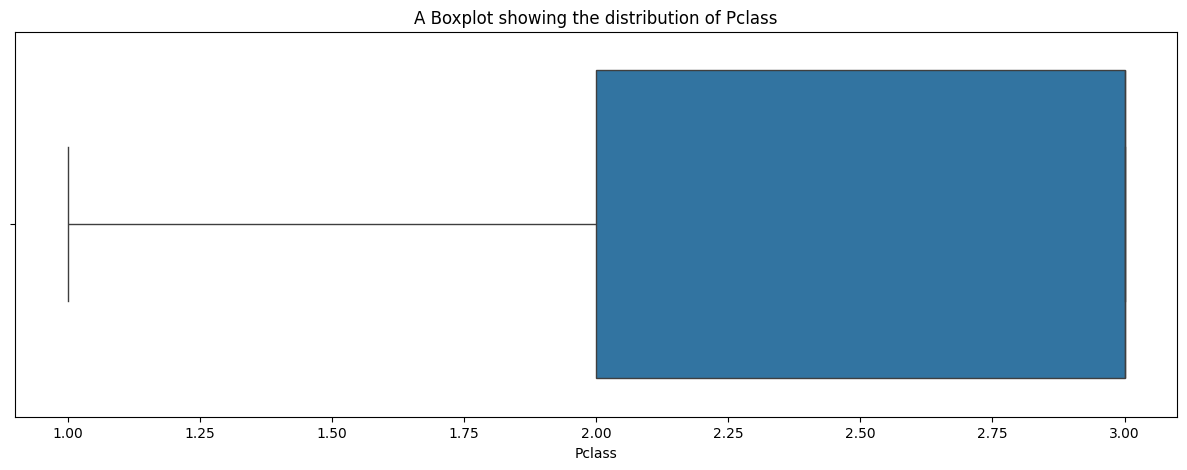

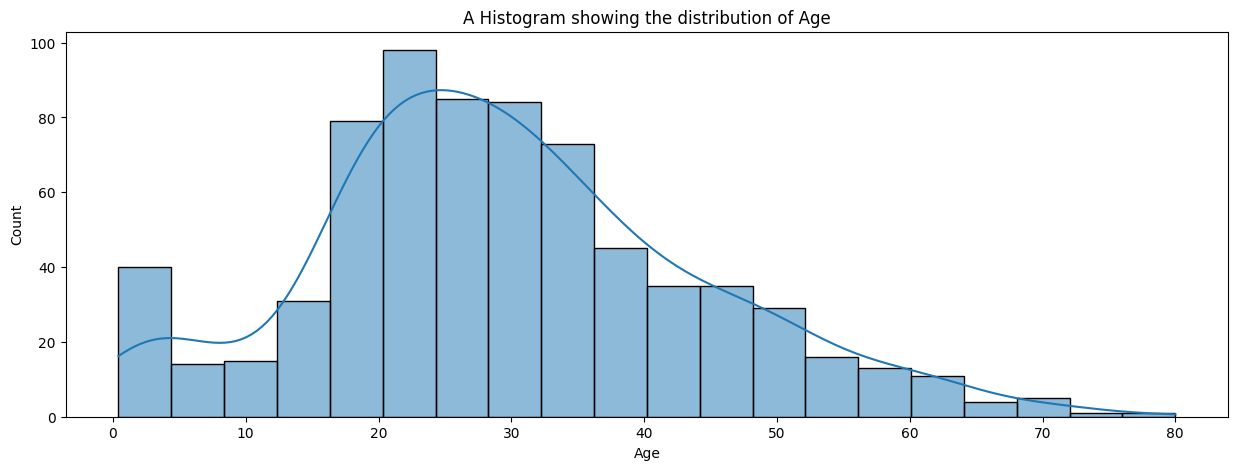

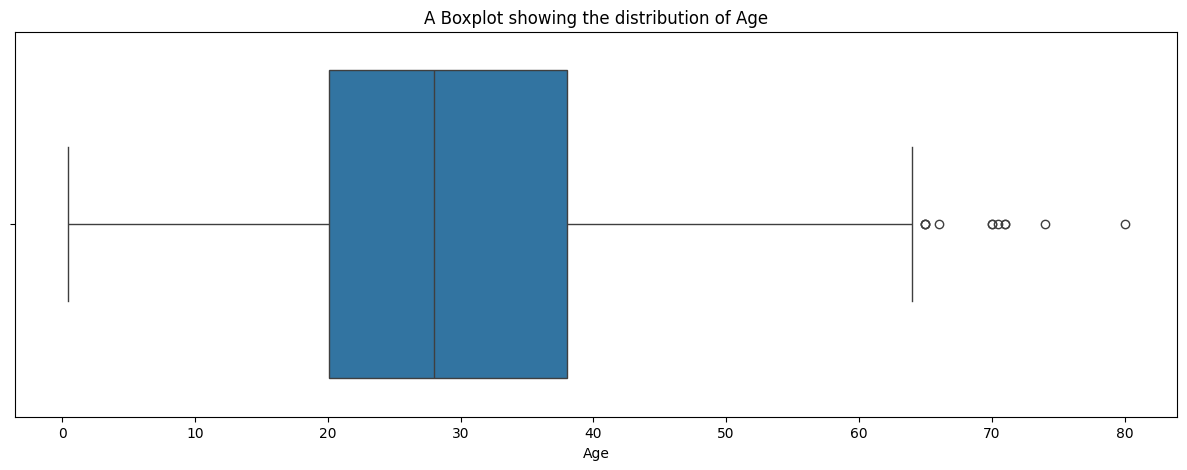

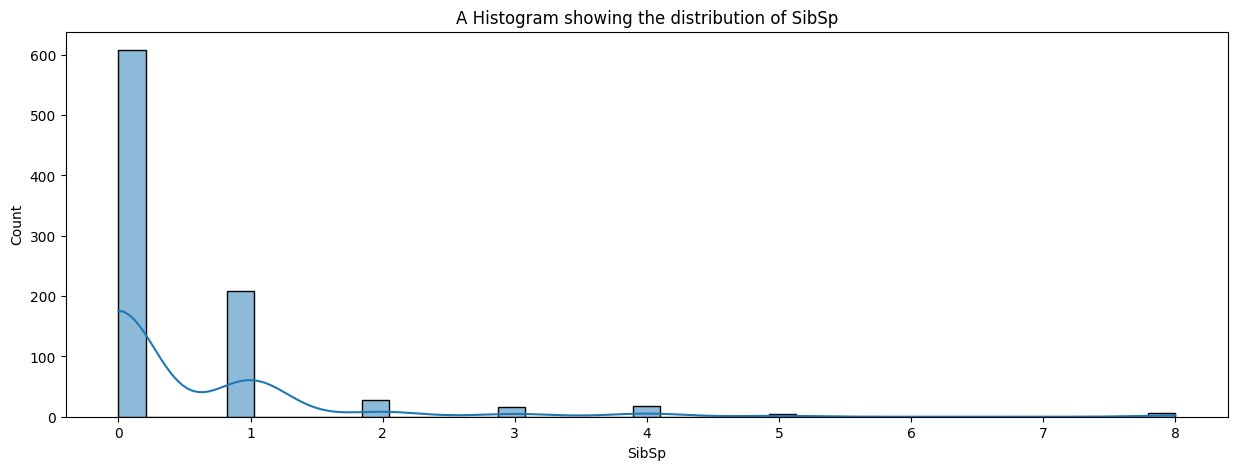

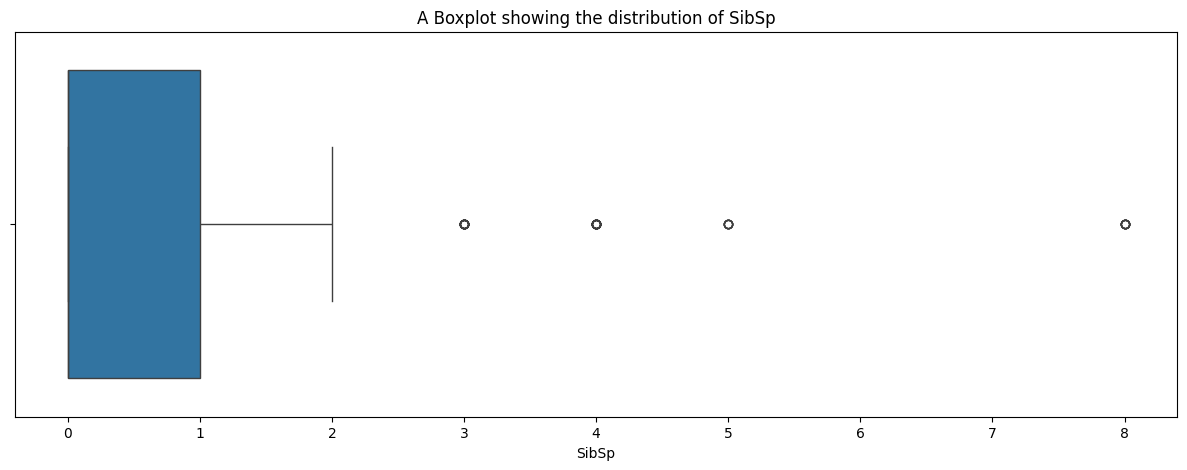

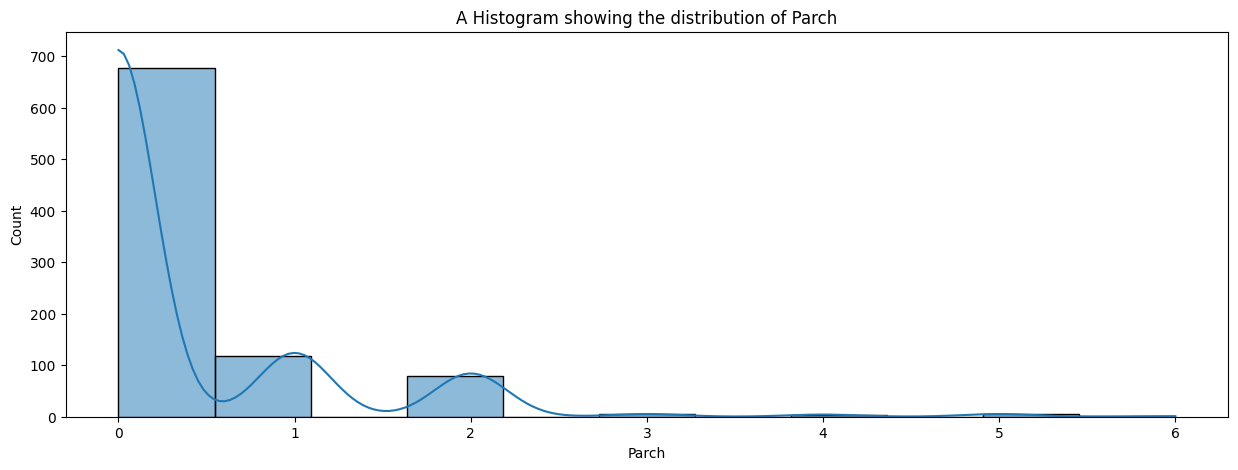

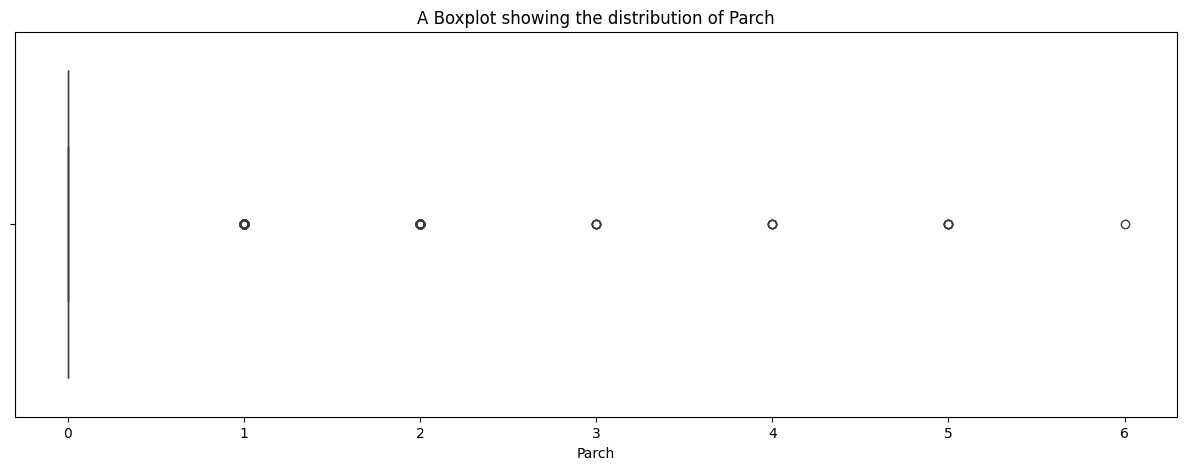

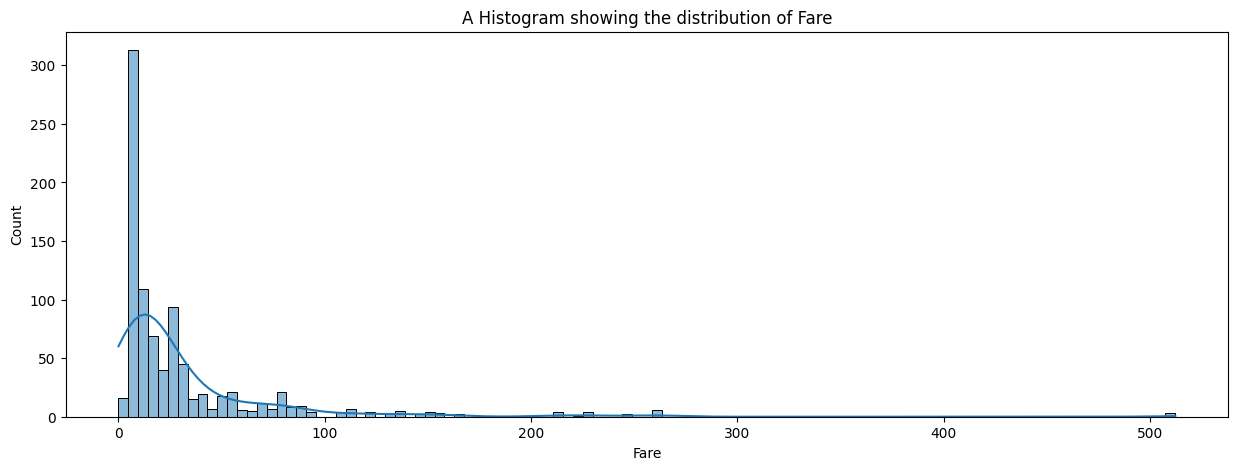

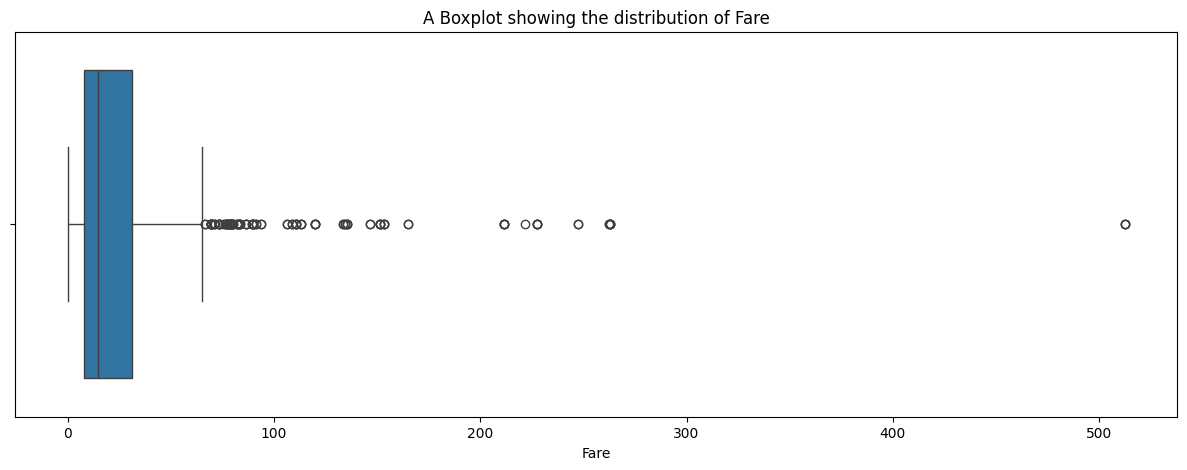

In [10]:
# A loop to create the graphs
for col in num_cols:
    plt.figure(figsize=(15,5))
    sns.histplot(data=titanic, x=col, kde=True)
    plt.title(f"A Histogram showing the distribution of {col}")
    plt.xlabel(f"{col}")

    plt.figure(figsize=(15,5))
    sns.boxplot(data=titanic, x=col)
    plt.title(f"A Boxplot showing the distribution of {col}")
    plt.xlabel(f"{col}")

In [11]:
# Visualizing Categorical columns
cat_cols = titanic.select_dtypes(include="object").columns
print(cat_cols)


Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


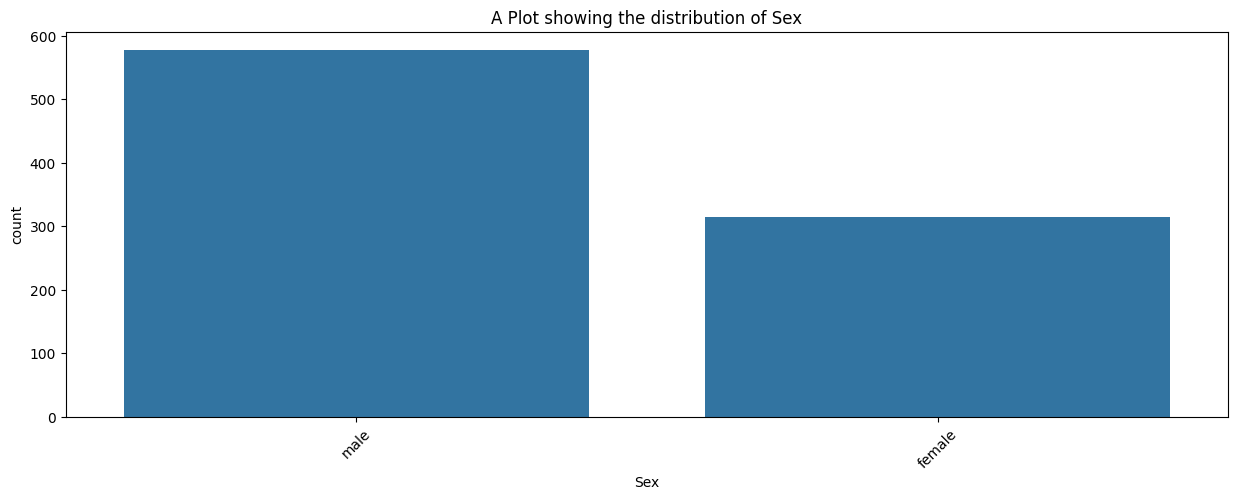

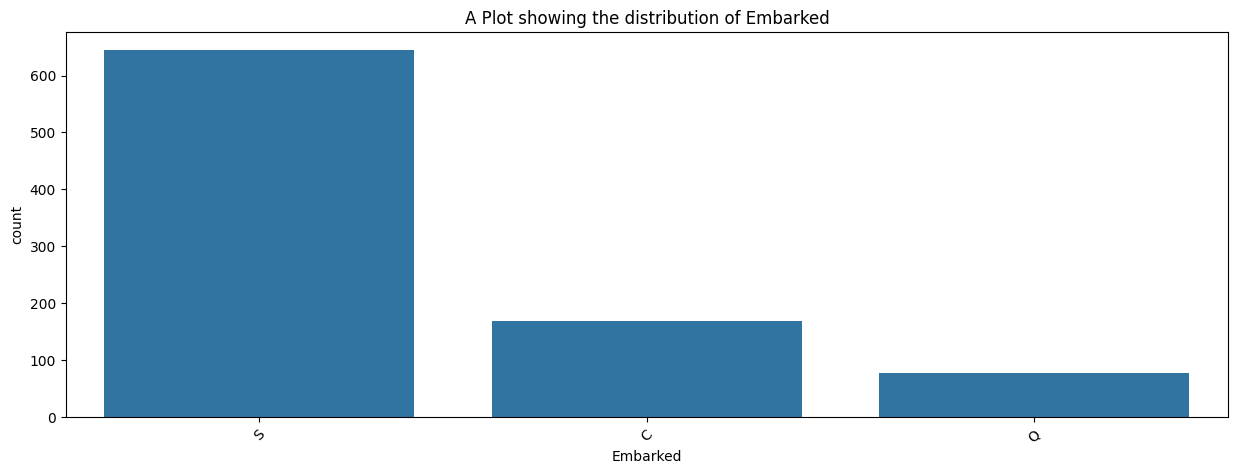

In [12]:
not_included = ['Name', 'Ticket']
for col in cat_cols:
    if col not in not_included:
        plt.figure(figsize=(15,5))
        sns.countplot(data=titanic, x=col)
        plt.title(f"A Plot showing the distribution of {col}")
        plt.xlabel(f"{col}")
        plt.xticks(rotation=45)

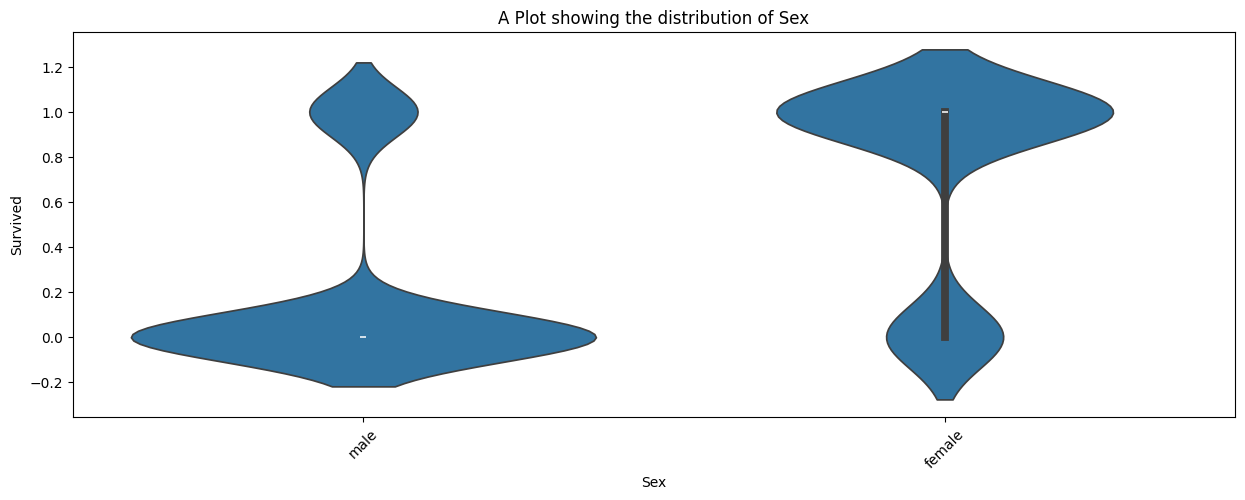

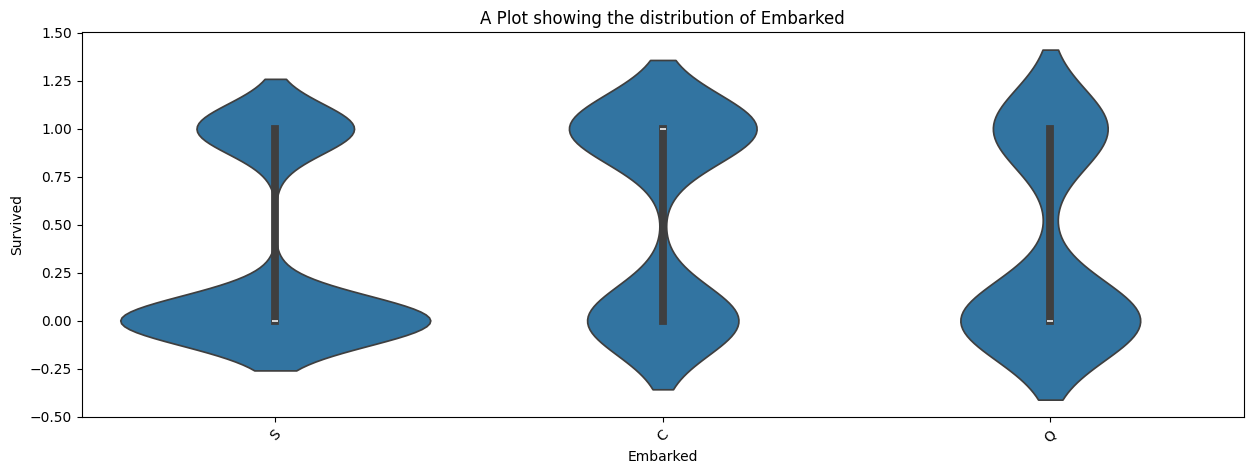

In [13]:
# Visualizing
for col in cat_cols:
    if col not in not_included:
        plt.figure(figsize=(15,5))
        sns.violinplot(data=titanic, x=col, y="Survived")
        plt.title(f"A Plot showing the distribution of {col}")
        plt.xlabel(f"{col}")
        plt.xticks(rotation=45)

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Text(0, 0.5, 'Survived')

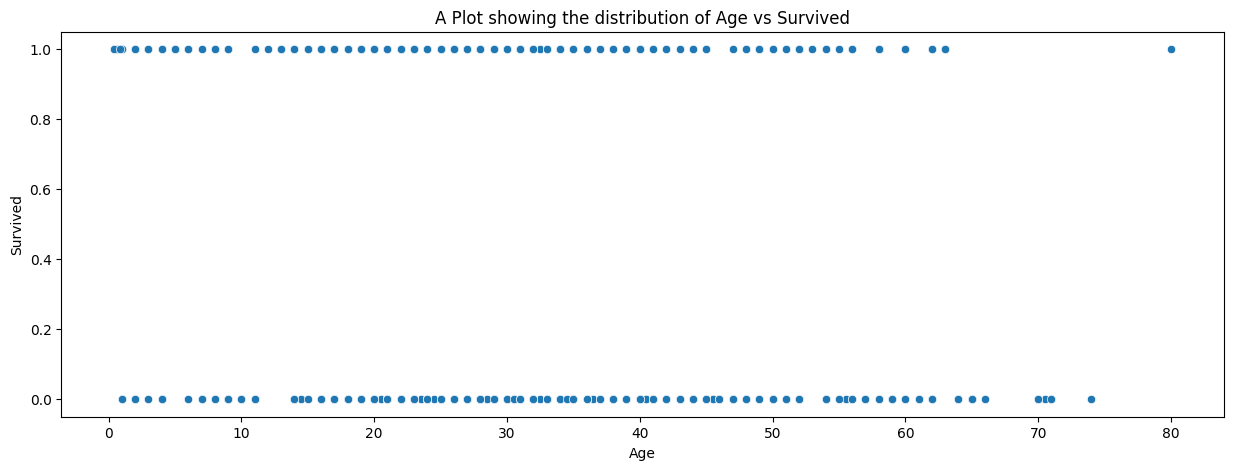

In [15]:
# Plotting numeric cols vs categorical cols
plt.figure(figsize=(15,5))
sns.scatterplot(data=titanic, x="Age", y="Survived")
plt.title(f"A Plot showing the distribution of Age vs Survived")
plt.xlabel("Age")
plt.ylabel("Survived")

In [16]:
# Grouping Sex by SibSp
gender_sp = pd.DataFrame(titanic.groupby("Sex")["SibSp"].sum())
print(gender_sp)

        SibSp
Sex          
female    218
male      248


In [17]:
gender_sp.sort_values(by="SibSp", ascending=False)

,SibSp
Sex,
male,248
female,218


Text(0, 0.5, 'Survived')

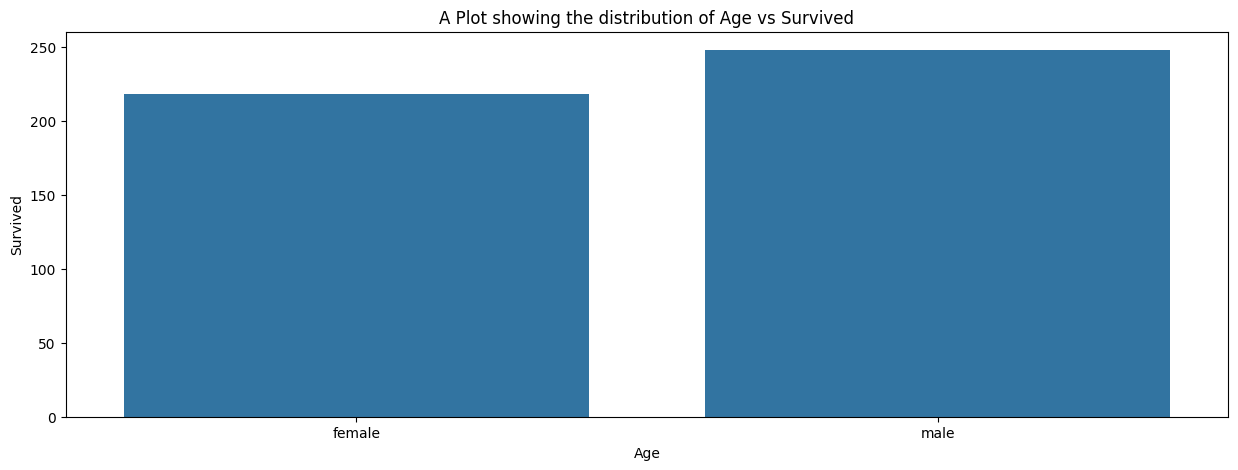

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(data=gender_sp, x=gender_sp.index, y="SibSp")
plt.title(f"A Plot showing the distribution of Age vs Survived")
plt.xlabel("Age")
plt.ylabel("Survived")

Text(0.5, 0, 'Embarking location')

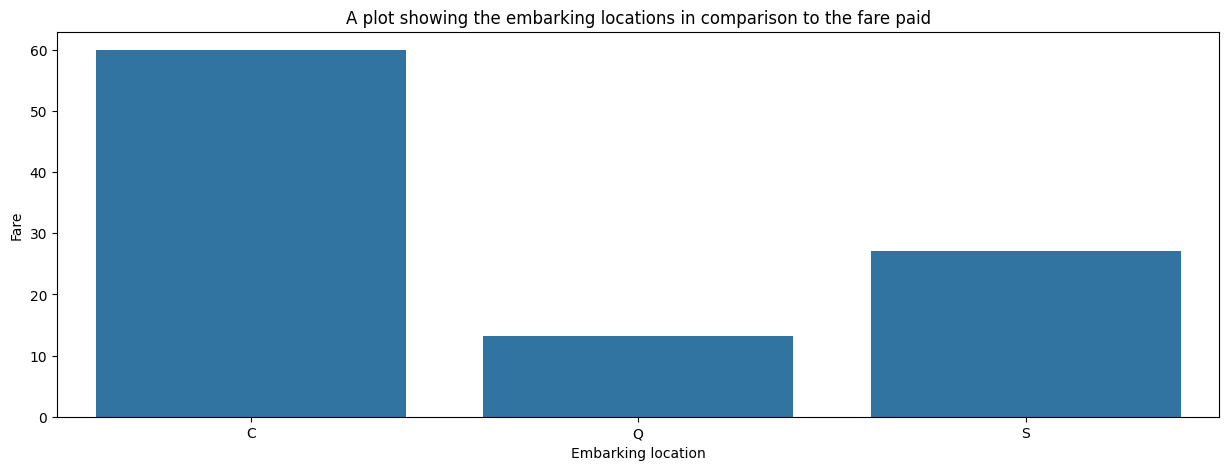

In [19]:
m_class=pd.DataFrame(titanic.groupby("Embarked")["Fare"].mean())
plt.figure(figsize=(15,5))
sns.barplot(data=m_class,x=m_class.index,y="Fare")
plt.title("A plot showing the embarking locations in comparison to the fare paid")
plt.xlabel("Embarking location")


Text(0.5, 0, 'Sex')

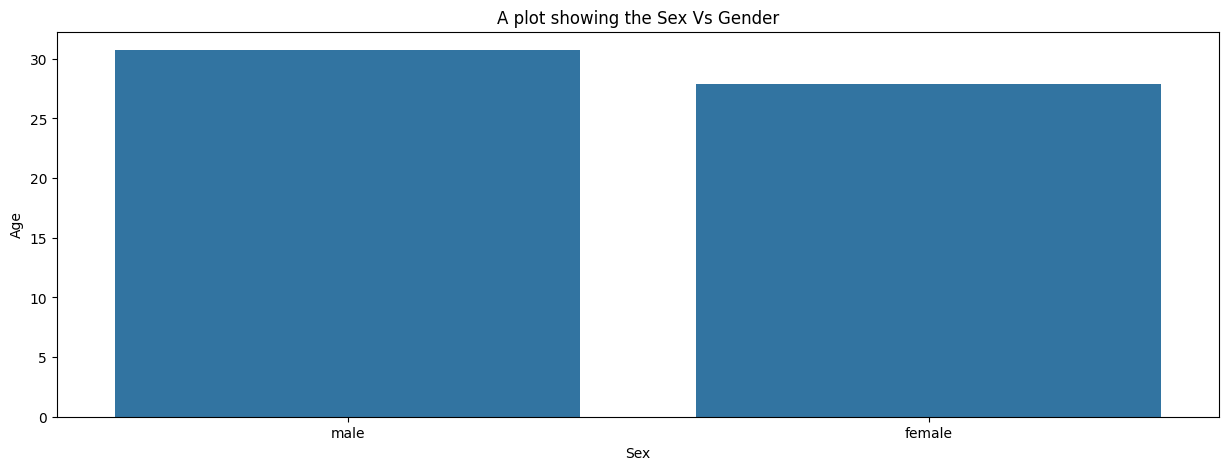

In [20]:
gender=pd.DataFrame(titanic.groupby("Sex")["Age"].mean())
gender1=gender.sort_values(by="Age",ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=gender1,x=gender1.index,y="Age")
plt.title("A plot showing the Sex Vs Gender")
plt.xlabel("Sex")

### Converting categorical values to numeric


In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [22]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [23]:
#filling missing values
mean_1=titanic["Age"].mean()
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

/tmp/ipython-input-3165104187.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)


In [24]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0],inplace=True)

/tmp/ipython-input-36809813.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Embarked"].fillna(titanic["Embarked"].mode()[0],inplace=True)


In [26]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
titanic.drop(["Name","Ticket"],axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [28]:
#Encoding
encoder=LabelEncoder()
titanic["Gender"]=encoder.fit_transform(titanic["Sex"])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [29]:
#one hot encoding (Embarked)
en_columns=titanic[["Embarked"]]
embarked=pd.get_dummies(en_columns,columns=["Embarked"])
embarked1=embarked.astype(int)
titanic=pd.concat([titanic,embarked1],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,0,1


In [30]:
#dropping sex and embarked columns
titanic.drop(["Sex","Embarked"],axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


#### Splitting the data into training and splitting sets

In [31]:
x=titanic.drop("Survived",axis=1)
y=titanic[["Survived"]]
x.shape

(891, 10)

In [32]:
#Splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
298,299,1,29.699118,0,0,30.5000,1,0,0,1
884,885,3,25.000000,0,0,7.0500,1,0,0,1
247,248,2,24.000000,0,2,14.5000,0,0,0,1
478,479,3,22.000000,0,0,7.5208,1,0,0,1
305,306,1,0.920000,1,2,151.5500,1,0,0,1


In [33]:
#Scaling the data
scaler=StandardScaler()
x_train_scaled=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test_scaled=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
x_test_scaled
x_train_scaled


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,-0.575735,-1.620517,0.017145,-0.467660,-0.468878,-0.032568,0.722247,-0.460805,-0.308354,0.595793
1,1.696946,0.809349,-0.344320,-0.467660,-0.468878,-0.487331,0.722247,-0.460805,-0.308354,0.595793
2,-0.773529,-0.405584,-0.421242,-0.467660,2.046870,-0.342854,-1.384569,-0.460805,-0.308354,0.595793
3,0.122358,0.809349,-0.575085,-0.467660,-0.468878,-0.478201,0.722247,-0.460805,-0.308354,0.595793
4,-0.548587,-1.620517,-2.196596,0.376656,2.046870,2.314937,0.722247,-0.460805,-0.308354,0.595793
...,...,...,...,...,...,...,...,...,...,...
663,-1.320368,0.809349,-0.652007,-0.467660,-0.468878,-0.475695,-1.384569,-0.460805,-0.308354,0.595793
664,-0.684328,-1.620517,0.017145,-0.467660,-0.468878,-0.022872,0.722247,-0.460805,-0.308354,0.595793
665,1.603867,0.809349,0.886429,1.220971,-0.468878,-0.350450,0.722247,-0.460805,-0.308354,0.595793
666,-0.044409,-1.620517,-1.190459,0.376656,2.046870,1.703093,-1.384569,-0.460805,-0.308354,0.595793


In [34]:
titanic["Survived"].value_counts()

,count
Survived,
0,549
1,342
